    Ben Christensen
    Math 347
    1/9/18

In [1]:
import numpy as np
import pdb
from math import sqrt
from numba import jit
from time import time
from matplotlib import pyplot as plt

In [2]:
# Problem 1
def max_path(filename="/Users/benchristensen/Desktop/ACME Python Labs/Volume1-Student-Materials/Profiling/triangle.txt"):
    """Find the maximum vertical path in a triangle of values."""
    with open(filename, 'r') as infile:
        data = [[int(n) for n in line.split()]
                        for line in infile.readlines()]
    def path_sum(r, c, total):
        """Recursively compute the max sum of the path starting in row r
        and column c, given the current total.
        """
        total += data[r][c]
        if r == len(data) - 1:          # Base case.
            return total
        else:                           # Recursive case.
            return max(path_sum(r+1, c,   total),   # Next row, same column
                       path_sum(r+1, c+1, total))   # Next row, next column

    return path_sum(0, 0, 0)            # Start the recursion from the top.

def max_path_fast(filename="/Users/benchristensen/Desktop/ACME Python Labs/Volume1-Student-Materials/Profiling/triangle_large.txt"):
    """Find the maximum vertical path in a triangle of values."""
    #Create list of lists representation of triangle of values
    with open(filename, 'r') as infile:
        data = [[int(n) for n in line.split()]
                        for line in infile.readlines()]
    #Replace each entry with the max sum of itself and one of its 2 children
    for r in range(len(data) - 2, -1, -1):
        for c in range(len(data[r])):
            data[r][c] += max(data[r+1][c], data[r+1][c+1])
    return data[0][0]


# Problem 2
def primes(N):
    """Compute the first N primes."""
    primes_list = []
    current = 2
    while len(primes_list) < N:
        isprime = True
        for i in range(2, current):     # Check for nontrivial divisors.
            if current % i == 0:
                isprime = False
        if isprime:
            primes_list.append(current)
        current += 1
    return primes_list

def primes_fast(N):
    """Compute the first N primes."""
    primes_list = [2]
    current = 3
    while len(primes_list) < N:
        isprime = True
        _sqrt = int(sqrt(current))
        for i in primes_list:
            if current % i == 0:
                isprime = False
                break
        #If p|n and 0 < p < n, then p <= sqrt(n)
            elif i > _sqrt:
                break
        if isprime:
            primes_list.append(current)
        #Except for 2, primes are always odd
        current += 2
    return primes_list


# Problem 3
def nearest_column(A, x):
    """Find the index of the column of A that is closest to x.

    Parameters:
        A ((m,n) ndarray)
        x ((m, ) ndarray)

    Returns:
        (int): The index of the column of A that is closest in norm to x.
    """
    distances = []
    for j in range(A.shape[1]):
        distances.append(np.linalg.norm(A[:,j] - x))
    return np.argmin(distances)

def nearest_column_fast(A, x):
    """Find the index of the column of A that is closest in norm to x.
    Refrain from using any loops or list comprehensions.

    Parameters:
        A ((m,n) ndarray)
        x ((m, ) ndarray)

    Returns:
        (int): The index of the column of A that is closest in norm to x.
    """
    return np.argmin(np.linalg.norm(A - x[:, None], axis=0))



# Problem 4
def name_scores(filename="/Users/benchristensen/Desktop/ACME Python Labs/Volume1-Student-Materials/Profiling/names.txt"):
    """Find the total of the name scores in the given file."""
    with open(filename, 'r') as infile:
        names = sorted(infile.read().replace('"', '').split(','))
    total = 0
    for i in range(len(names)):
        name_value = 0
        for j in range(len(names[i])):
            alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
            for k in range(len(alphabet)):
                if names[i][j] == alphabet[k]:
                    letter_value = k + 1
            name_value += letter_value
        total += (names.index(names[i]) + 1) * name_value
    return total

def name_scores_fast(filename='/Users/benchristensen/Desktop/ACME Python Labs/Volume1-Student-Materials/Profiling/names.txt'):
    """Find the total of the name scores in the given file."""
    with open(filename, 'r') as infile:
        names = sorted(infile.read().replace('"', '').split(','))
    total = 0
    alphabet = {j:i+1 for i,j in enumerate("ABCDEFGHIJKLMNOPQRSTUVWXYZ")}
    for i, name in enumerate(names):
        total += (i + 1) * sum([alphabet[letter] for letter in name])
    return total



# Problem 5
def fibonacci():
    """Yield the terms of the Fibonacci sequence with F_1 = F_2 = 1."""
    F_n, F_n_1 = 1, 1
    yield F_n
    yield F_n_1
    while True:
        F_n_1 = F_n + F_n_1
        yield F_n_1
        F_n = F_n_1 + F_n
        yield F_n

def fibonacci_digits(N=1000):
    """Return the index of the first term in the Fibonacci sequence with
    N digits.

    Returns:
        (int): The index.
    """
    for i,F in enumerate(fibonacci()):
        if F > 10**(N-1):
            return i+1


# Problem 6
def prime_sieve(N):
    """Yield all primes that are less than N."""
    yield 2
    numbers = [number for number in range(3, N+1, 2)]
    while numbers:
        divisor = numbers[0]
        yield divisor
        numbers = [number for number in numbers if number % divisor != 0]

# Problem 7
def matrix_power(A, n):
    """Compute A^n, the n-th power of the matrix A."""
    product = A.copy()
    temporary_array = np.empty_like(A[0])
    m = A.shape[0]
    for power in range(1, n):
        for i in range(m):
            for j in range(m):
                total = 0
                for k in range(m):
                    total += product[i,k] * A[k,j]
                temporary_array[j] = total
            product[i] = temporary_array
    return product

@jit
def matrix_power_numba(A, n):
    """Compute A^n, the n-th power of the matrix A, with Numba optimization."""
    product = A.copy()
    temporary_array = np.empty_like(A[0])
    m = A.shape[0]
    for power in range(1, n):
        for i in range(m):
            for j in range(m):
                total = 0
                for k in range(m):
                    total += product[i,k] * A[k,j]
                temporary_array[j] = total
            product[i] = temporary_array
    return product

def prob7(n=10):
    """Time matrix_power(), matrix_power_numba(), and np.linalg.matrix_power()
    on square matrices of increasing size. Plot the times versus the size.
    """
    matrix = matrix_power_numba(np.random.random((2, 2)), 2)

    slow_times, fast_times, faster_times = [], [], []
    y = [2**i for i in range(2,8)]
    for m in y:
        A = np.random.random((m,m))

        start = time()
        matrix_power(A,n)
        end = time()
        slow_times.append(end - start)

        start = time()
        matrix_power_numba(A,n)
        end = time()
        fast_times.append(end - start)

        start = time()
        np.linalg.matrix_power(A,n)
        end = time()
        faster_times.append(end - start)

    plt.loglog(y, slow_times, label="Pure Python")
    plt.loglog(y, fast_times, label="Numba")
    plt.loglog(y, faster_times, label="NumPy")
    plt.title("Comparing Times to Compute n Powers of A")
    plt.legend(loc="upper left")
    plt.xlabel("Size of A (m x m)")
    plt.ylabel("Time")
    plt.show()


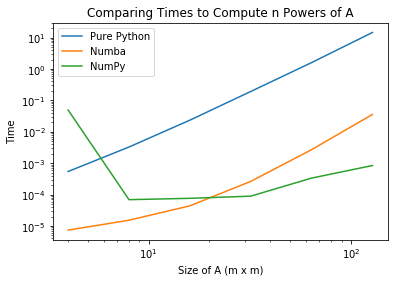

In [3]:
prob7()